In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("advertising.csv")

In [7]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Expoloratory Analysis

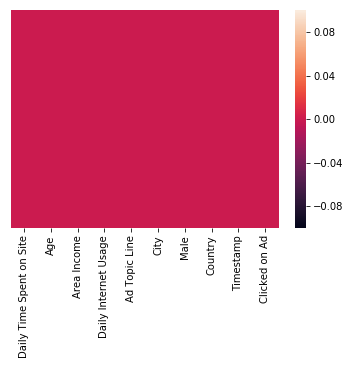

In [8]:
sns.heatmap(data.isnull(), yticklabels=False )

So now we know that there are no missing values

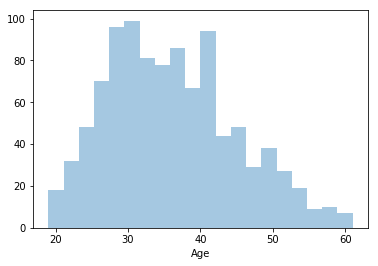

In [15]:
sns.distplot(data["Age"], kde=False, bins=20)

Ages seem to be distributed around the 25-45 age range

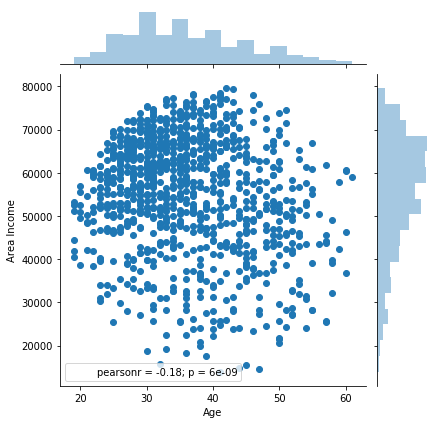

In [16]:
sns.jointplot("Age", "Area Income", data, )

Income seems generally evenly distributed

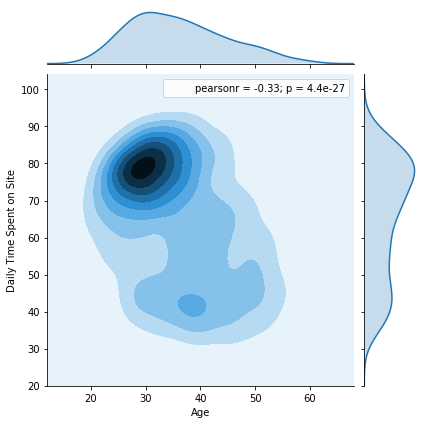

In [17]:
sns.jointplot( "Age", "Daily Time Spent on Site", data, kind="kde")

A kde distrbution showing age versus time spent on the site

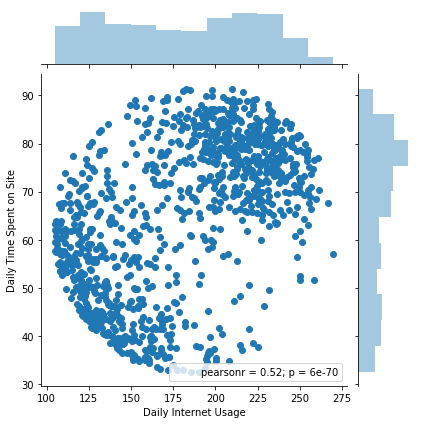

In [19]:
sns.jointplot("Daily Internet Usage", "Daily Time Spent on Site", data)

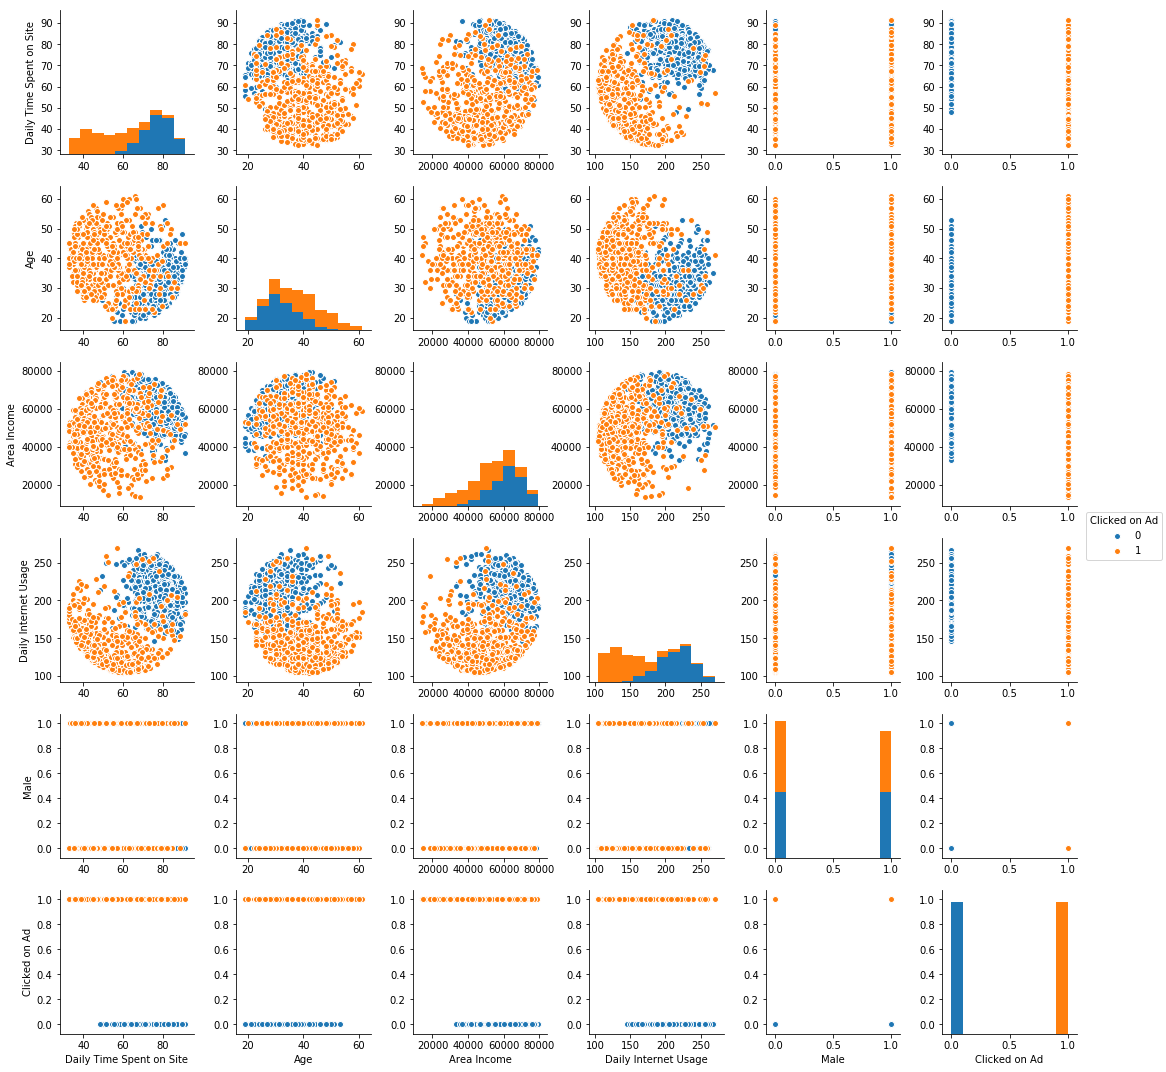

In [20]:
sns.pairplot(data, hue="Clicked on Ad")

# Logistic Regression Time
Going to split advertising data into train and test sets. Then perform a logisitic regression to see if any of these factors can predict whether or not they would click on the ad.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [28]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Clicked on Ad', 'Ad Topic Line', 'City', 'Country', 'Timestamp'],axis=1), 
                                                    data['Clicked on Ad'], test_size=0.30, 
                                                    random_state=101)

In [32]:
logisticModel = LogisticRegression()
logisticModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
predictions = logisticModel.predict(X_test)

In [35]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.91      0.95      0.93       157
          1       0.94      0.90      0.92       143

avg / total       0.92      0.92      0.92       300

